In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

In [3]:
countries = pd.read_csv("Proyecto/countries.csv")

In [4]:
paises = pd.DataFrame(countries.loc[:, ["continent",
                       "location",
                       "date",
                       'total_cases_per_million', 
                       "total_deaths_per_million"]])

In [5]:
from datetime import date, datetime, timedelta as td
paises["date"]  = pd.to_datetime(paises["date"], format="%d/%m/%Y")

In [6]:
paises.dtypes

continent                           object
location                            object
date                        datetime64[ns]
total_cases_per_million            float64
total_deaths_per_million           float64
dtype: object

In [7]:
# Función para obtener sólo el año en otra columna 
get_year = lambda x: x.year
# Mapping para obtener sólo el año en otra columna 
paises["year"] = paises["date"].map(get_year)

In [8]:
paises

,continent,location,date,total_cases_per_million,total_deaths_per_million,year
0,Asia,Afghanistan,2020-02-24,0.126,NaN,2020
1,Asia,Afghanistan,2020-02-25,0.126,NaN,2020
2,Asia,Afghanistan,2020-02-26,0.126,NaN,2020
3,Asia,Afghanistan,2020-02-27,0.126,NaN,2020
4,Asia,Afghanistan,2020-02-28,0.126,NaN,2020
...,...,...,...,...,...,...
138936,Africa,Zimbabwe,2021-12-05,9213.121,312.082,2021
138937,Africa,Zimbabwe,2021-12-06,9213.121,312.082,2021
138938,Africa,Zimbabwe,2021-12-07,9382.414,312.281,2021
138939,Africa,Zimbabwe,2021-12-08,9980.539,312.745,2021


In [29]:
paises = paises.dropna(subset=["total_deaths_per_million"])
paises = paises.dropna(subset=["total_cases_per_million"])
paises

,continent,location,date,total_cases_per_million,total_deaths_per_million,year
28,Asia,Afghanistan,2020-03-23,1.004,0.025,2020
29,Asia,Afghanistan,2020-03-24,1.054,0.025,2020
30,Asia,Afghanistan,2020-03-25,1.858,0.025,2020
31,Asia,Afghanistan,2020-03-26,2.008,0.050,2020
32,Asia,Afghanistan,2020-03-27,2.284,0.050,2020
...,...,...,...,...,...,...
138936,Africa,Zimbabwe,2021-12-05,9213.121,312.082,2021
138937,Africa,Zimbabwe,2021-12-06,9213.121,312.082,2021
138938,Africa,Zimbabwe,2021-12-07,9382.414,312.281,2021
138939,Africa,Zimbabwe,2021-12-08,9980.539,312.745,2021


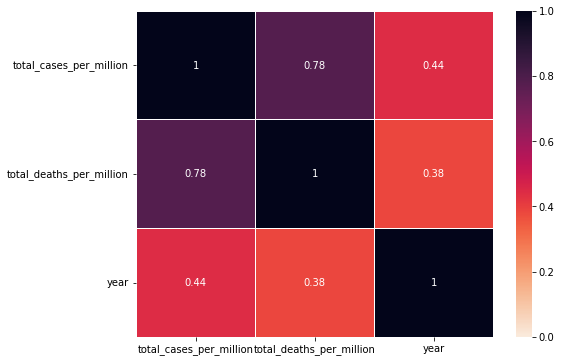

In [30]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(paises.corr(), vmin=0, vmax=1, annot=True, cmap="rocket_r", linewidth=0.5)

In [50]:
# Vamos a ver si se puede hacer un modelo por probabilidad por año
X = paises[["total_deaths_per_million"]]
y = paises[["year"]]

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [53]:
logreg = LogisticRegression()

In [54]:
logreg.fit(X_train, y_train)

C:\Users\Frida\miniconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [55]:
y_pred = logreg.predict(X_test)
y_pred

array([2020, 2020, 2020, ..., 2021, 2020, 2020], dtype=int64)

In [56]:
logreg.score(X_test, y_test)

0.6651194004809574

In [57]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

cnf_matrix

array([[12687,  3013],
       [ 8963, 11099]], dtype=int64)

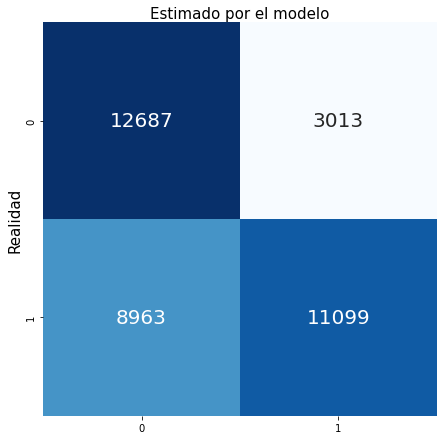

In [60]:
class_names=[2020,2021] # name  of classes
fig, ax = plt.subplots(figsize=(6, 6))
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g', cbar=False, annot_kws={"size": 20})
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.ylabel('Realidad', fontsize=15, y=0.5)
plt.xlabel('Estimado por el modelo', fontsize=15);

In [62]:
tn, fp, fn, tp = cnf_matrix.ravel()

print("Precision:",metrics.precision_score(y_test, y_pred, pos_label=2021))
print("Exactitud:",metrics.accuracy_score(y_test, y_pred))
print("Sensibilidad:",metrics.recall_score(y_test, y_pred, pos_label=2021))
print("Especificidad:", tn / (tn + fp))

Precision: 0.7864937641723356
Exactitud: 0.6651194004809574
Sensibilidad: 0.553234971588077
Especificidad: 0.8080891719745223


In [64]:
from sklearn.metrics import roc_curve, auc

In [65]:
y_pred_proba = logreg.predict_proba(X_test)

y_pred_proba[:10,:]

array([[0.58708273, 0.41291727],
       [0.59013602, 0.40986398],
       [0.60807832, 0.39192168],
       [0.04136632, 0.95863368],
       [0.50100822, 0.49899178],
       [0.51230371, 0.48769629],
       [0.02717152, 0.97282848],
       [0.40227005, 0.59772995],
       [0.60960968, 0.39039032],
       [0.54738323, 0.45261677]])

In [67]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1], pos_label=2021)
roc_auc = auc(fpr, tpr)

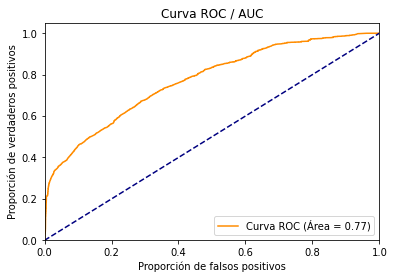

In [70]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='Curva ROC (Área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Proporción de falsos positivos')
plt.ylabel('Proporción de verdaderos positivos')
plt.title('Curva ROC / AUC')
plt.legend(loc="lower right")
plt.show()